<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Examining-data-from-a-file" data-toc-modified-id="Examining-data-from-a-file-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Examining data from a file</a></span></li><li><span><a href="#EDA-(for-all-the-time)" data-toc-modified-id="EDA-(for-all-the-time)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA (for all the time)</a></span><ul class="toc-item"><li><span><a href="#Phone-release-(produced-and-sold-over-the-past-time-and-by-year)" data-toc-modified-id="Phone-release-(produced-and-sold-over-the-past-time-and-by-year)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Phone release (produced and sold over the past time and by year)</a></span></li><li><span><a href="#Ratio-of-smartphones-and-non-smartphones" data-toc-modified-id="Ratio-of-smartphones-and-non-smartphones-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Ratio of smartphones and non-smartphones</a></span></li><li><span><a href="#Distribution-by-phone-form" data-toc-modified-id="Distribution-by-phone-form-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Distribution by phone form</a></span></li><li><span><a href="#Top-3-phone-by-the-all-time" data-toc-modified-id="Top-3-phone-by-the-all-time-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Top-3 phone by the all time</a></span></li><li><span><a href="#The-most-failed-phone-of-all-time" data-toc-modified-id="The-most-failed-phone-of-all-time-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>The most failed phone of all time</a></span></li></ul></li><li><span><a href="#EDA-(by-2020)" data-toc-modified-id="EDA-(by-2020)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA (by 2020)</a></span><ul class="toc-item"><li><span><a href="#Most-popular-phone" data-toc-modified-id="Most-popular-phone-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Most popular phone</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Analysis of the best-selling phones

I found this dataset on a Kaggle and it became interesting to me to bring out the top of the best-selling phones of all time. Well, let's see what happens.

In [1]:
# importing the necessary libraries

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

import plotly.io as pio
pio.renderers.default='notebook'

## Examining data from a file

In [2]:
# read the file
df = pd.read_csv("best-selling-mobile-phones.csv")

In [3]:
pd.options.display.float_format = '{:20,.2f}'.format

# Forming a dataframe with general summary information
def info_df(df):
    info = pd.DataFrame()

    info['dtype'] = [df[x].dtype for x in df.columns]
    info.index = df.columns
    info['count'] = [df[x].count() for x in df.columns]
    info['na, %'] = round(df.isna().sum() * 100 / len(df), 2)
    info['nunique'] = [df[x].nunique() for x in df.columns]
    info['min'] = [df[x].min() for x in df.columns]
    info['mean'] = [pd.to_numeric(df[x], errors='coerce').mean() for x in df.columns]
    info['max'] = [df[x].max() for x in df.columns]

    display(info)

In [4]:
# let's look at the information about the data frame and first 5 rows
info_df(df)
df.head()

,dtype,count,"na, %",nunique,min,mean,max
manufacturer,object,111,0.00,14,Apple,NaN,Xiaomi
model,object,111,0.00,111,"105 (2013), 105 (2015)","3,078.00","iPhone XR, iPhone XS and iPhone XS Max"
form,object,111,0.00,7,Bar,NaN,Touchscreen
smartphone,object,111,0.00,2,No,NaN,Yes
year,int64,111,0.00,22,1996,"2,011.86",2021
units_sold_m,float64,111,0.00,69,2.00,50.45,250.00


,manufacturer,model,form,smartphone,year,units_sold_m
0,Nokia,1100,Bar,No,2003,250.00
1,Nokia,1110,Bar,No,2005,247.50
2,Apple,iPhone 6 and iPhone 6 Plus,Touchscreen,Yes,2014,224.00
3,Nokia,"105 (2013), 105 (2015)",Bar,No,2013,200.00
4,Apple,iPhone 6S and iPhone 6S Plus,Touchscreen,Yes,2015,174.10


Judging by the table above, we have 111 rows and 6 columns with information about the sales of phones from 14 companies in the period from 1996 to 2021.
There are no omissions or obvious duplicates.

## EDA (for all the time)

### Phone release (produced and sold over the past time and by year)

Let's look at the companies and how many phones they have produced and sold over the past time and by year

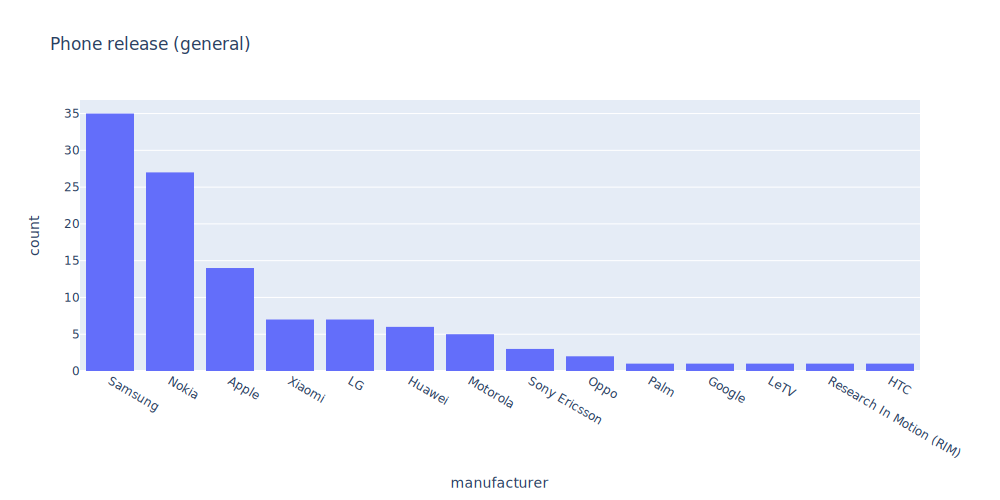

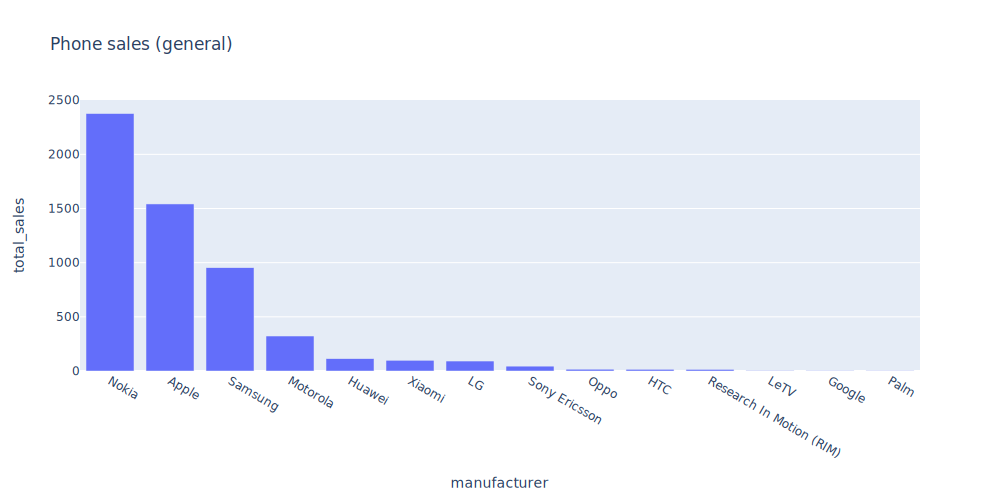

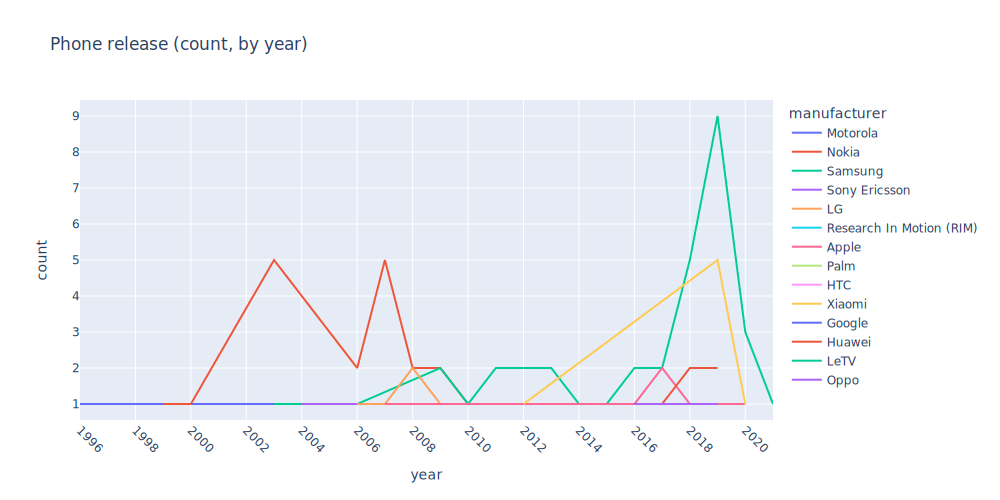

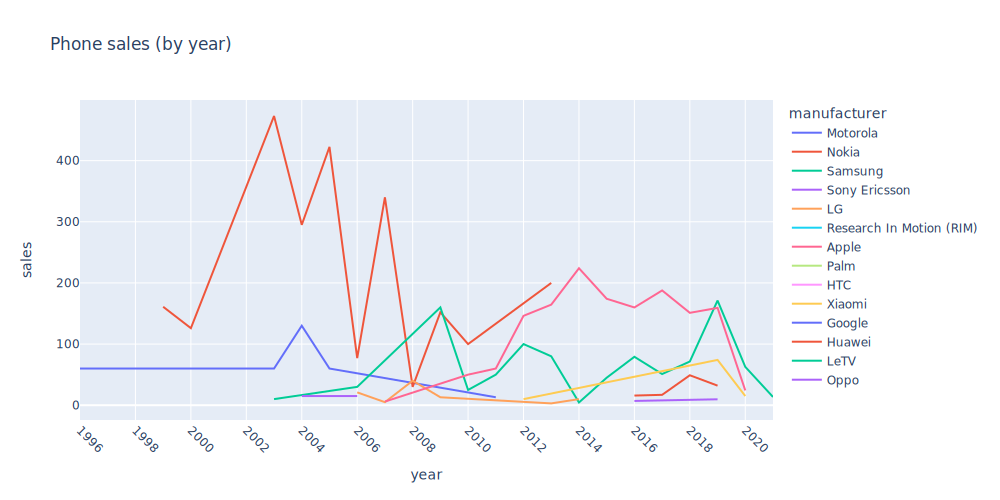

In [5]:
# --phone_release--

fig = px.histogram(df, x='manufacturer', title='Phone release (general)', width=1000)
fig.update_xaxes(categoryorder="total descending")
fig.show('svg')

# --phone_sales--

sales_phones_all_time = df.groupby(['manufacturer'], as_index=False) \
                 .agg({'units_sold_m':'sum'}) \
                 .rename(columns={'units_sold_m': 'total_sales'}) \
                 .sort_values(by='total_sales', ascending=False)

fig = px.bar(sales_phones_all_time, x='manufacturer', y='total_sales', title='Phone sales (general)', width=1000)
fig.show('svg')

# --count_phones--

count_phones = df.groupby(['year', 'manufacturer'], as_index=False) \
                 .agg({'form':'count'}) \
                 .rename(columns={'form': 'count'})

fig = px.line(count_phones, x='year', y='count', color='manufacturer',
              title='Phone release (count, by year)', width=1000)
fig.update_xaxes(tickangle=45, dtick=2)
fig.show('svg')

# --sales_phones--

sales_phones = df.groupby(['year', 'manufacturer'], as_index=False) \
                 .agg({'units_sold_m':'sum'}) \
                 .rename(columns={'units_sold_m': 'sales'})

fig = px.line(sales_phones, x='year', y='sales', color='manufacturer',
              title='Phone sales (by year)', width=1000)
fig.update_xaxes(tickangle=45, dtick=2)
fig.show('svg')

`Samsung` produced the most phones in terms of the number of phones - 35 phones. Followed by `Nokia` (27) and `Apple` (14). (*first picture*)

The same three are in the top in terms of sales (but the order is already different):
* **Nokia** - 2376,5
* **Apple** - 1541,9
* **Samsung** - 953,6 (*second picture*)



Lately most popular manufacturer is Apple, Samsung and Xiaomi (by the sales, *fourth picture*). Samsung And Xiaomi are the leaders in the number of phone releases. (*third picture*)

### Ratio of smartphones and non-smartphones

At the info table we have two types of phones: smartphone or not. Let's look at the ratio of smartphones and non-smartphones

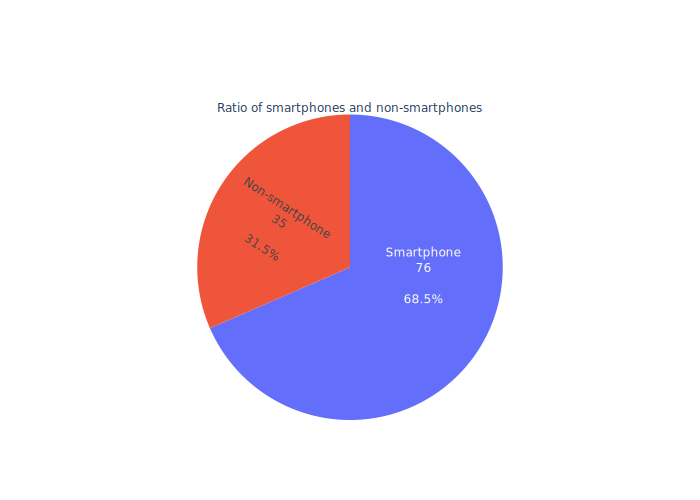

In [6]:
# group dataset by smatphone and aggregete count func
data = df.groupby('smartphone', as_index=False) \
         .agg({'year':'count'}) \
         .rename(columns={'year': 'count'})
data['smartphone'] = data['smartphone'].replace({'Yes': 'Smartphone', 'No': 'Non-smartphone'})

fig = go.Figure(data=[go.Pie(labels=data['smartphone'], values=data['count'], textinfo='label+percent+value',
                             insidetextorientation='radial',
                             showlegend=False, title='Ratio of smartphones and non-smartphones'
                            )])
fig.show('svg')

Smartphones on the horse! It is not surprising, because if the first mobile phone for a wide range of people appeared in 1983 Motorola DynaTAC 8000X, then the first serial smartphone — in 2002. It was a smartphone of the Finnish company Nokia — Nokia 9210 with the Symbian operating system. Since we have a data set since 1996, there are mostly more smartphones in the dataset than non-smartphones.

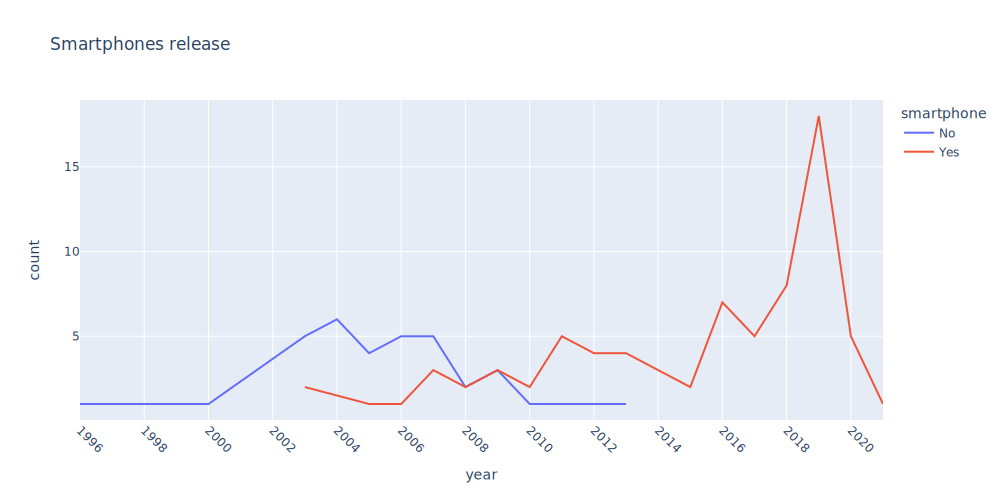

In [7]:
smartphones = df.groupby(['year', 'smartphone'], as_index=False) \
                 .agg({'form':'count'}) \
                 .rename(columns={'form': 'count'})

fig = px.line(smartphones, x='year', y='count', color='smartphone', title='Smartphones release', width=1000)
fig.update_xaxes(tickangle=45, dtick=2)
fig.show('svg')

After 2013, non-smartphones didn't produced. Smartphones, as I said, have been produced since 2003.

### Distribution by phone form

Also we have in this dataset column with form of phone. Let's look their distribution.

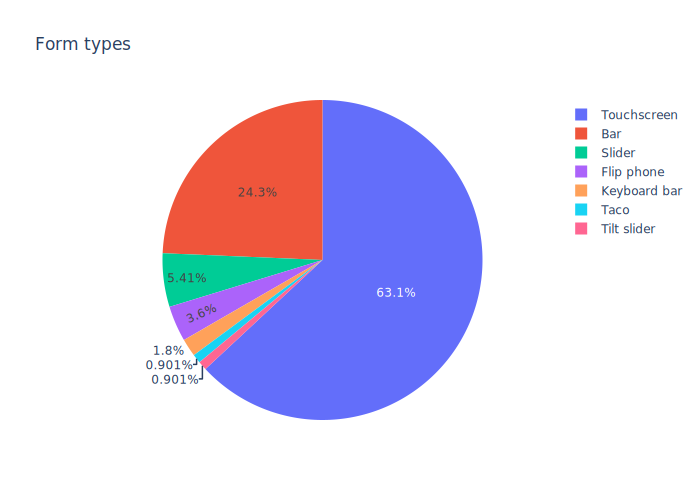

In [8]:
forms = df.groupby(['form'], as_index=False) \
                 .agg({'model':'count'}) \
                 .rename(columns={'model': 'count'})
fig = px.pie(forms, names='form', values='count', title='Form types')
fig.show('svg')

Touchscreen (*63.1%, 70 phones*) most popular by produced. After that Bar (*24.3%, 27 phones*) and Slider (*5.41%, 6 phones*). Tilt slider and Taco has the lowest output (*one model at a time*).

### Top-3 phone by the all time

In [9]:
df.sort_values(by='units_sold_m', ascending=False).head(3)

,manufacturer,model,form,smartphone,year,units_sold_m
0,Nokia,1100,Bar,No,2003,250.00
1,Nokia,1110,Bar,No,2005,247.50
2,Apple,iPhone 6 and iPhone 6 Plus,Touchscreen,Yes,2014,224.00


So, it is a Nokia 1100 in 2003, 2005 year and iPhone 6 and iPhone 6 Plus of 2016.

### The most failed phone of all time

In [10]:
df.sort_values(by='units_sold_m').head(1)

,manufacturer,model,form,smartphone,year,units_sold_m
110,Nokia,N97,Tilt slider,Yes,2009,2.00


Nokia leads both at the beginning and from the end.

## EDA (by 2020)

### Most popular phone

In [11]:
df_last_y = df.query('year == 2020').copy()

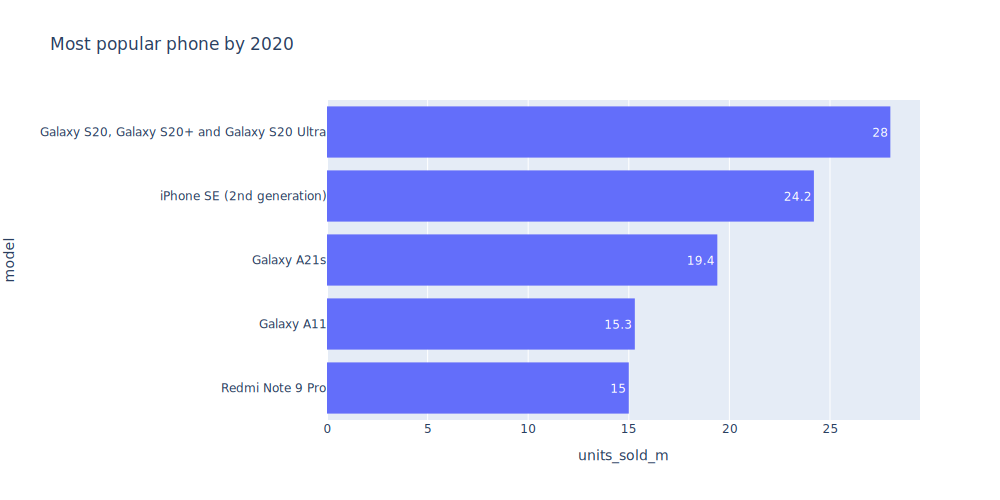

In [12]:
fig = px.histogram(df_last_y, x='units_sold_m', y='model', text_auto=True,
                   title='Most popular phone by 2020', width=1000)
fig.update_yaxes(categoryorder="total ascending")
fig.update_xaxes(title='units_sold_m')
fig.show('svg')

Galaxy S20, Galaxy S20+ and Galaxy S20 Ultra is the most popular phone*. 

*According to the available dataset

## Conclusion

As a result, we analyzed data on sales and production of various phones in the period from 1996 to 2020.

Here's what we managed to find out:
* Samsung, Nokia and Apple produced the most phones in terms of the number of phones;
* Phones of the same companies have the largest sales;
* Touchscreen most popular by produced;
* Top-3 phone by the all time is Nokia 1100 in 2003, 2005 year and iPhone 6 and iPhone 6 Plus of 2016;
* Most popular phone by 2020 - Galaxy S20, Galaxy S20+ and Galaxy S20 Ultra.